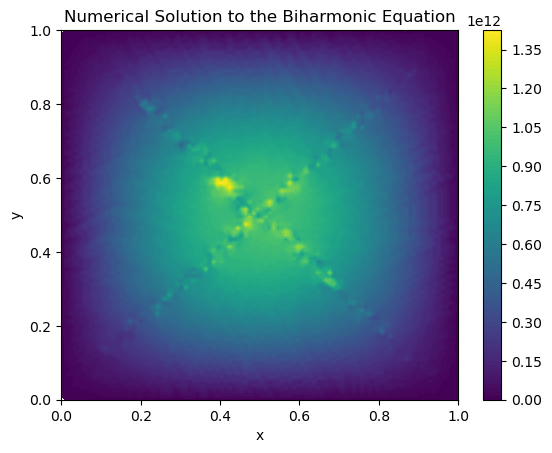

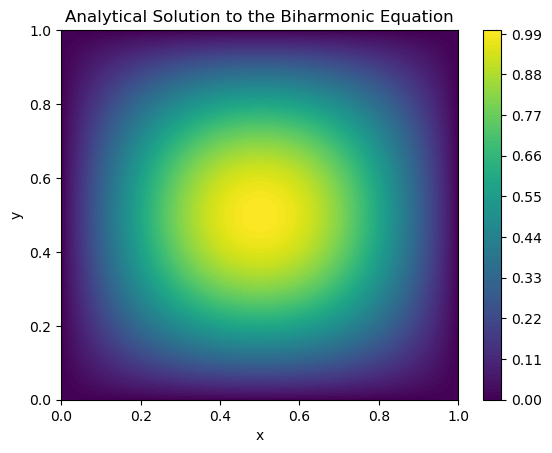

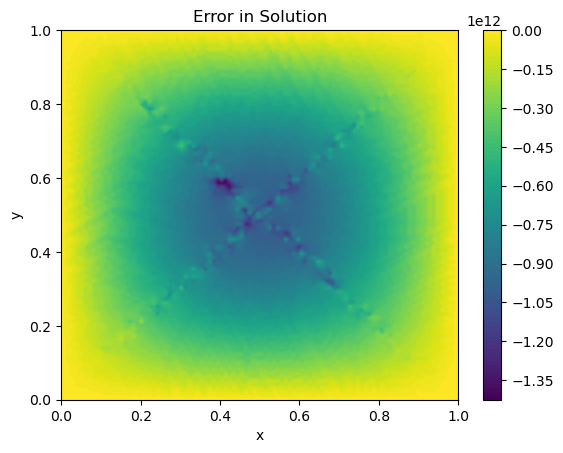

In [25]:
from ngsolve import *
from netgen.geom2d import unit_square
import numpy as np
import matplotlib.pyplot as plt

"""
Biharmonic test of higher differential operators
    - Using built in Hessian operator
"""

# Generate a mesh
mesh = Mesh(unit_square.GenerateMesh(maxh=0.01))

# Define finite element space of order 3
fes = H1(mesh, order=5, dirichlet='.*')
u, v = fes.TnT()

# Analytical solution and source term
u_analytical = sin(pi*x) * sin(pi*y)
f_analytical = CF((4 * pi**4 * sin(pi*x) * sin(pi*y)))

# Define the Hessian operator
def Hesse(u):
    return u.Operator("hesse")

# Bilinear form using Hessian
bf = BilinearForm(fes)
bf += InnerProduct(Hesse(u), Hesse(v)) * dx
bf.Assemble()
bf.mat.DeleteZeroElements(1e-10)

# Define the source term f
f = LinearForm(fes)
f += f_analytical * v * dx
f.Assemble()

# Solve the system bf * u = f
gfu = GridFunction(fes)
inv = bf.mat.Inverse(fes.FreeDofs())
gfu.vec.data = inv * f.vec

# Optionally, you can plot the solution or the error
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U_numerical = np.zeros_like(X)
U_analytical = np.zeros_like(X)

for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        U_numerical[i, j] = gfu(mesh(x_vals[i], y_vals[j]))
        U_analytical[i, j] = np.sin(np.pi*x_vals[i]) * np.sin(np.pi*y_vals[j])

plt.figure()
plt.contourf(X, Y, U_numerical, levels=100, cmap="viridis")
plt.colorbar()
plt.title("Numerical Solution to the Biharmonic Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.contourf(X, Y, U_analytical, levels=100, cmap="viridis")
plt.colorbar()
plt.title("Analytical Solution to the Biharmonic Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.contourf(X, Y, U_analytical - U_numerical, levels=100, cmap="viridis")
plt.colorbar()
plt.title("Error in Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

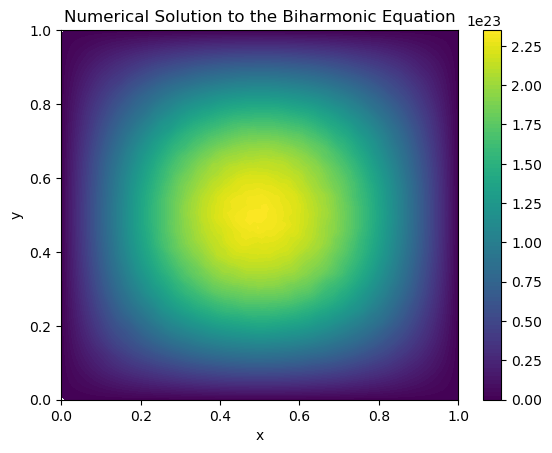

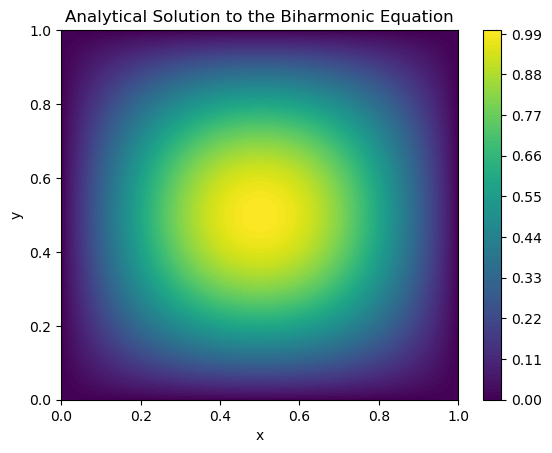

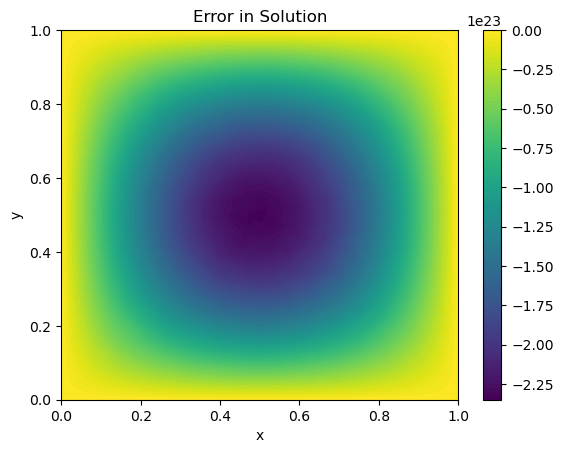

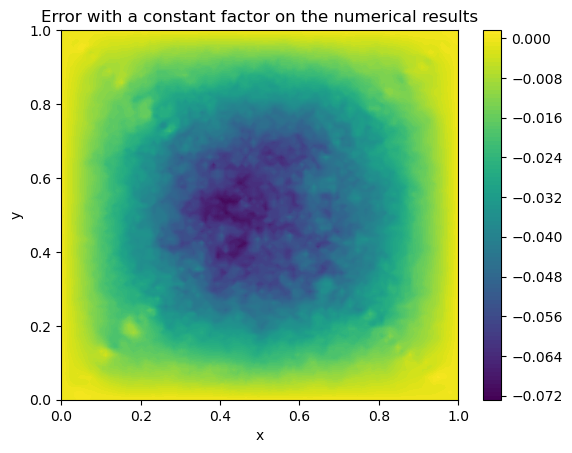

In [26]:
from ngsolve import *
from netgen.geom2d import unit_square
import numpy as np
import matplotlib.pyplot as plt

"""
Biharmonic test of higher differential operators
    - Using trick of Joachim
"""

# Generate a mesh
mesh = Mesh(unit_square.GenerateMesh(maxh=0.01))

# Define finite element space of order 3
fes = H1(mesh, order=5, dirichlet='.*')
u, v = fes.TnT()

fes2 = H1(mesh, order=3)**2

# Analytical solution and source term
u_analytical = sin(pi*x) * sin(pi*y)
f_analytical = CF((4 * pi**4 * sin(pi*x) * sin(pi*y)))

# Define the Hessian operator
bf = BilinearForm(InnerProduct(grad(Interpolate(grad(u), fes2)), grad(Interpolate(grad(v), fes2))) * dx).Assemble()
bf.mat.DeleteZeroElements(1e-10)

# Define the source term f
f = LinearForm(fes)
f += f_analytical * v * dx
f.Assemble()

# Solve the system bf * u = f
gfu = GridFunction(fes)
inv = bf.mat.Inverse(fes.FreeDofs())
gfu.vec.data = inv * f.vec

# Optionally, you can plot the solution or the error
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U_numerical = np.zeros_like(X)
U_analytical = np.zeros_like(X)

for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        U_numerical[i, j] = gfu(mesh(x_vals[i], y_vals[j]))
        U_analytical[i, j] = np.sin(np.pi*x_vals[i]) * np.sin(np.pi*y_vals[j])

plt.figure()
plt.contourf(X, Y, U_numerical, levels=100, cmap="viridis")
plt.colorbar()
plt.title("Numerical Solution to the Biharmonic Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.contourf(X, Y, U_analytical, levels=100, cmap="viridis")
plt.colorbar()
plt.title("Analytical Solution to the Biharmonic Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.contourf(X, Y, U_analytical - U_numerical, levels=100, cmap="viridis")
plt.colorbar()
plt.title("Error in Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.contourf(X, Y, U_analytical - U_numerical / 2.19e23, levels=100, cmap="viridis")
plt.colorbar()
plt.title("Error with a constant factor on the numerical results")
plt.xlabel("x")
plt.ylabel("y")
plt.show()